<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/NinjaCart_DL_Classification_CaseStudy_Mariya_DSML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/ninjacart_data.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall('/content/ninja')

  zip.close()
  print('Done')

Done


In [6]:
drive.flush_and_unmount()

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [7]:
image_size = (224, 224)
batch_size = 32

train_ds = image_dataset_from_directory(
    '/content/ninja/ninjacart_data/train',
    labels = 'inferred',
    label_mode = 'int',
    validation_split = 0.2,
    subset = 'training',
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

val_ds = image_dataset_from_directory(
    '/content/ninja/ninjacart_data/train',
    labels = 'inferred',
    label_mode = 'int',
    validation_split = 0.2,
    subset = 'validation',
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

Found 3135 files belonging to 4 classes.
Using 2508 files for training.
Found 3135 files belonging to 4 classes.
Using 627 files for validation.


In [12]:
data_dir = '/content/ninja/ninjacart_data/train'
class_names = os.listdir(data_dir)

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print(f"{class_name}: {num_images} images")

onion: 849 images
indian market: 599 images
tomato: 789 images
potato: 898 images


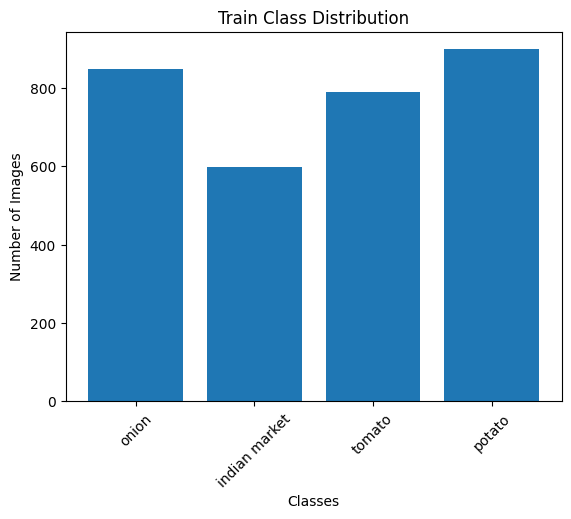

In [19]:
class_counts = [len(os.listdir(os.path.join(data_dir, class_name))) for class_name in class_names]

plt.bar(class_names, class_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Train Class Distribution')
plt.xticks(rotation=45)
plt.show()


In [21]:
test_ds = image_dataset_from_directory(
    '/content/ninja/ninjacart_data/test',
    labels = 'inferred',
    label_mode = 'int',
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

Found 351 files belonging to 4 classes.


In [22]:
data_dir = '/content/ninja/ninjacart_data/test'
class_names = os.listdir(data_dir)

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print(f"{class_name}: {num_images} images")


onion: 83 images
indian market: 81 images
tomato: 106 images
potato: 81 images


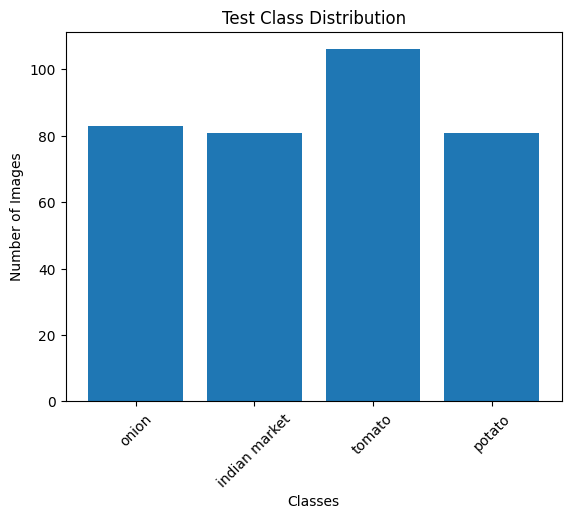

In [23]:
class_counts = [len(os.listdir(os.path.join(data_dir, class_name))) for class_name in class_names]

plt.bar(class_names, class_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Test Class Distribution')
plt.xticks(rotation=45)
plt.show()

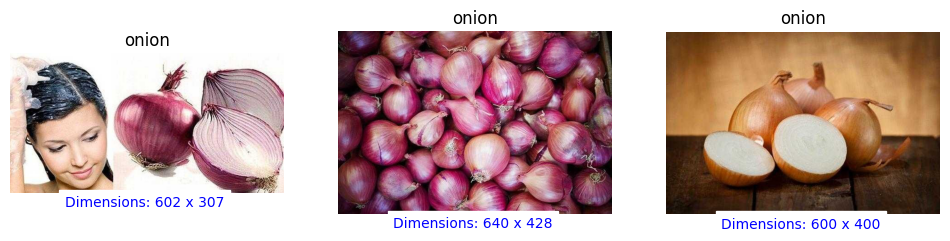

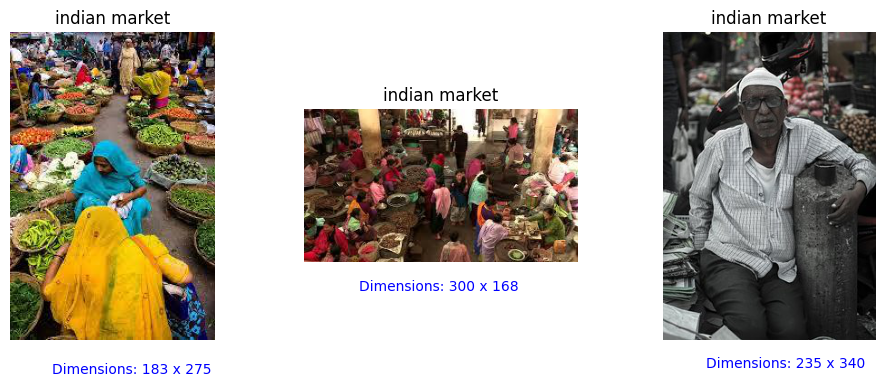

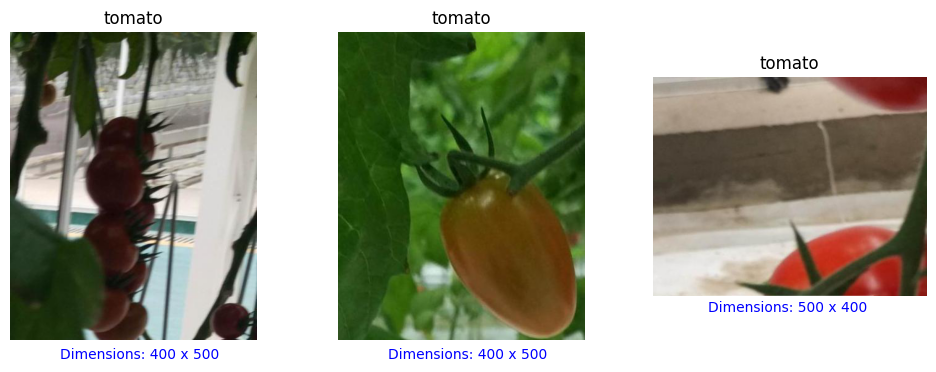

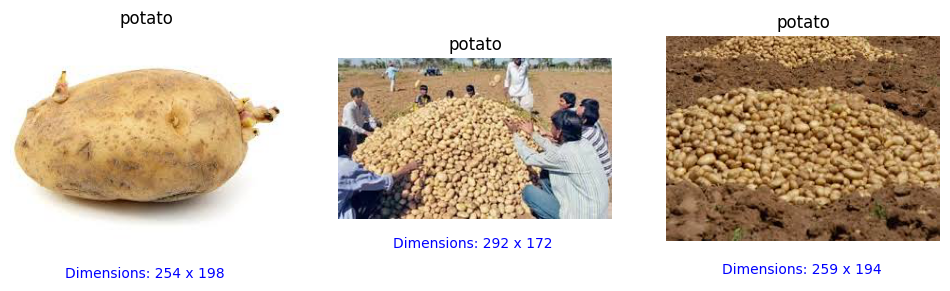

In [45]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the number of images to display per class
num_images_to_display = 3

# Loop over each class and display sample images
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_dir)[:num_images_to_display]
    
    # Create a subplot for each image
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 4))
    
    # Loop over image files and display them
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(class_dir, image_file)
        image = Image.open(image_path)
        
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(class_name)

        # Get image dimensions and display them as text
        width, height = image.size
        axes[i].text(width/5, height+30, f"Dimensions: {width} x {height}", color='blue', backgroundcolor='white')
    
    plt.show()


In [97]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                                                rotation_range=40, 
                                                                width_shift_range=0.2,
                                                                validation_split=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255., validation_split=0.2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory('/content/ninja/ninjacart_data/train',
                                                    subset='training',
                                                    batch_size = 32,
                                                    class_mode = 'sparse',
                                                    target_size=(224, 224))

test_generator = test_datagen.flow_from_directory('/content/ninja/ninjacart_data/test',
                                                  batch_size=32, 
                                                  class_mode = 'sparse',
                                                  target_size = (224, 224))

val_generator = val_datagen.flow_from_directory('/content/ninja/ninjacart_data/train',
                                                    subset='validation',
                                                    batch_size = 32,
                                                    class_mode = 'sparse',
                                                    target_size=(224, 224))


Found 2511 images belonging to 4 classes.
Found 351 images belonging to 4 classes.
Found 624 images belonging to 4 classes.


In [98]:
# Get a batch of data from the train generator
x_train, y_train = next(train_generator)

# Verify the shape of the input data and labels
print("Train data shape:", x_train.shape)
print("Train labels shape:", y_train.shape)

# Get a batch of data from the test generator
x_test, y_test = next(test_generator)

# Verify the shape of the input data and labels
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Train data shape: (32, 224, 224, 3)
Train labels shape: (32,)
Test data shape: (32, 224, 224, 3)
Test labels shape: (32,)


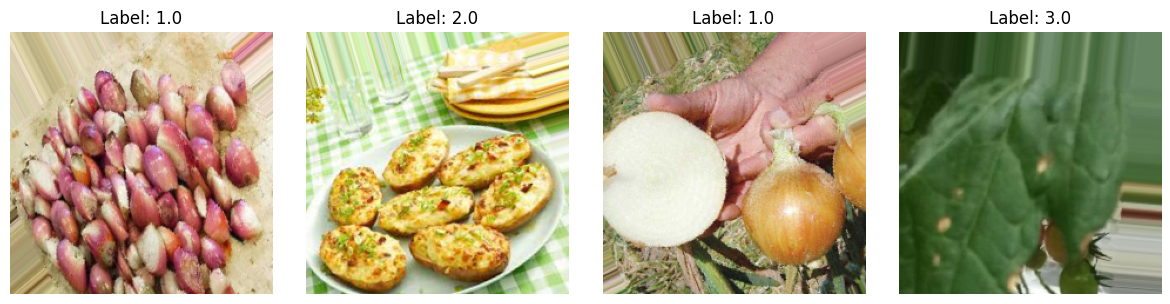

In [99]:
import matplotlib.pyplot as plt

# Plot a few images with labels from the train generator
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axes[i].imshow(x_train[i])
    axes[i].set_title("Label: {}".format(y_train[i]))
    axes[i].axis("off")
plt.tight_layout()
plt.show()


In [100]:
NUM_CLASSES = 5

model =tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(256,activation=tf.keras.activations.tanh),
                               tf.keras.layers.Dropout(0.3),
                               tf.keras.layers.Dense(512,activation=tf.keras.activations.tanh),
                               tf.keras.layers.Dropout(0.3),
                               tf.keras.layers.Dense(1024,activation=tf.keras.activations.tanh),
                               tf.keras.layers.Dropout(0.3),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(NUM_CLASSES, kernel_initializer='zeros',activation=tf.keras.activations.softmax),
                         
])

# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [101]:
SCHEDULE_BOUNDARIES = [20, 40, 60]
BATCH_SIZE = 128
lr = 0.003 * BATCH_SIZE / 512 

# Decay learning rate by a factor of 10 at SCHEDULE_BOUNDARIES.
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=SCHEDULE_BOUNDARIES, 
                                                                   values=[lr, lr*0.1, lr*0.001, lr*0.0001])
# optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [102]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [103]:
hist = model.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 10, 
    verbose = 2
)

Epoch 1/10
79/79 - 190s - loss: 1.4017 - accuracy: 0.2732 - val_loss: 1.4052 - val_accuracy: 0.2308 - 190s/epoch - 2s/step
Epoch 2/10
79/79 - 101s - loss: 1.3852 - accuracy: 0.2859 - val_loss: 1.4050 - val_accuracy: 0.2308 - 101s/epoch - 1s/step
Epoch 3/10
79/79 - 99s - loss: 1.3832 - accuracy: 0.2879 - val_loss: 1.4047 - val_accuracy: 0.2308 - 99s/epoch - 1s/step
Epoch 4/10
79/79 - 100s - loss: 1.3829 - accuracy: 0.2859 - val_loss: 1.4045 - val_accuracy: 0.2308 - 100s/epoch - 1s/step
Epoch 5/10
79/79 - 111s - loss: 1.3859 - accuracy: 0.2863 - val_loss: 1.4043 - val_accuracy: 0.2308 - 111s/epoch - 1s/step
Epoch 6/10
79/79 - 101s - loss: 1.3837 - accuracy: 0.2859 - val_loss: 1.4041 - val_accuracy: 0.2308 - 101s/epoch - 1s/step
Epoch 7/10
79/79 - 100s - loss: 1.3842 - accuracy: 0.2851 - val_loss: 1.4040 - val_accuracy: 0.2308 - 100s/epoch - 1s/step
Epoch 8/10
79/79 - 100s - loss: 1.3836 - accuracy: 0.2855 - val_loss: 1.4037 - val_accuracy: 0.2308 - 100s/epoch - 1s/step
Epoch 9/10
79/79 -

In [109]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\n Test Accuracy: ", round(test_acc,2)*100, "%")

11/11 - 3s - loss: 1.4034 - accuracy: 0.2308 - 3s/epoch - 305ms/step

 Test Accuracy:  23.0 %


In [105]:
preds = model.predict(test_generator)
predicted_labels = np.argmax(preds, axis=1)

11/11 [==============================] - 3s 277ms/step


In [108]:
# class_names = []
final_predictions = [class_name[i] for i in predicted_labels]